### Часть I: О теореме Байеса

#### Вопрос 1
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.
#### Ответ:
Прокурор берет априорную вероятность что у случаного человека будет такая группа крови и приравнивает эту вероятность к условной вероятности $P(\text{редкая группа крови}|\text{невиновен})$ и после этого делает вывод о вероятности $P(\text{невиновен}|\text{редкая группа крови})$.

Во-первых, $P(\text{редкая группа крови}) \neq P(\text{редкая группа крови}|\text{невиновен})$

Во-вторых, если $P(\text{редкая группа крови}|\text{невиновен})$ мала, это не значит, что мала $P(\text{невиновен}|\text{редкая группа крови})$ т.к.

$$P(\text{невиновен}|\text{редкая группа крови}) = \frac{P(\text{редкая группа крови}|\text{невиновен})*P(\text{невиновен})}{P(\text{редкая группа крови})}$$
Априорная вероятность невиновности довольно большая, редкая группа крови - редкая, поэтому итоговая условная вероятность большая


#### Вопрос 2

Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

#### Ответ:

Адвокат приводит вероятность выбрать случайного человека из всех редкокровных, то есть он с такой же вероятностью виновен как и эти 10000 человек. Если нет других зацепок

Но во-первых, эта вероятность не эквивалентна вероятности $𝑃(\text{виновен}|\text{редкая группа крови})$. Ему стоило оценить именно эту вероятность

Во-вторых, эта информация все равно в 100 раз сужает круг подозреваемых, и таким образом ее нельзя исключать из материалов дела

#### Вопрос 3

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

In [1]:
# зависимость от false positive и false negative
# alpha - false positive
# beta - false negative
# вероятность болезни при условии t в зависимости от ошибок alpha и beta

def p(alpha, beta, t):
    if t == 1:
        return (1-beta)*0.01/((1-beta)*0.01 + alpha*0.99)
    else:
        return beta*0.01/(beta*0.01 + (1-alpha)*0.99)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

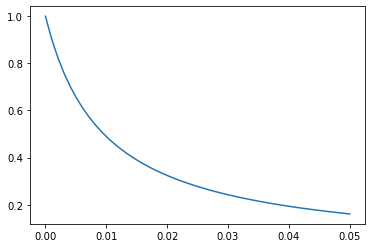

In [29]:
# зависимость p(d=1|t=1) от false-positive
alphas = np.linspace(0., 0.05)
y = p(alphas, beta=0.05, t=1)
plt.plot(alphas, y)

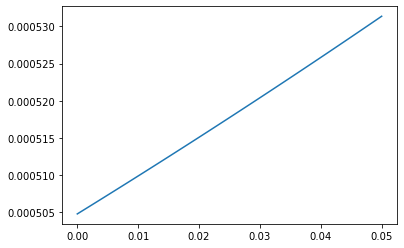

In [26]:
# зависимость p(d=1|t=0) от false-positive
alphas = np.linspace(0., 0.05)
y = p(alphas, beta=0.05, t=0)
plt.plot(alphas, y)

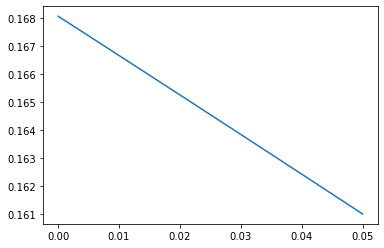

In [24]:
# зависимость p(d=1|t=1) от false-negative
betas = np.linspace(0., 0.05)
y = p(alpha=0.05, beta=betas, t=1)
plt.plot(alphas, y)

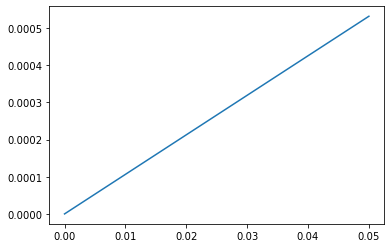

In [25]:
# зависимость p(d=1|t=0) от false-negative
betas = np.linspace(0., 0.05)
y = p(alpha=0.05, beta=betas, t=0)
plt.plot(alphas, y)

#### Ответ:

Значительнее всего снижается p(d=1|t=1) при снижении false-positive. p(d=1|t=0) снижается при уменьшении false-negative, но это вероятность и так мала, поэтому целесообразно сосредоточиться на снижении false-positive ошибки

### Часть II: О линейной регрессии

#### Вопрос 1:
Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [1]:
import pandas as pd

In [2]:
covid = pd.read_csv('owid-covid-data.csv')

In [10]:
covid = covid[(covid['location'] == 'Russia')
      &(covid['date'] >= '2020-03-03')]

covid['new_cases'] = covid['new_cases'].replace(0, 1)

In [12]:
covid_train = covid.iloc[:50, :]
covid_test = covid.iloc[:50, :]

<AxesSubplot:>

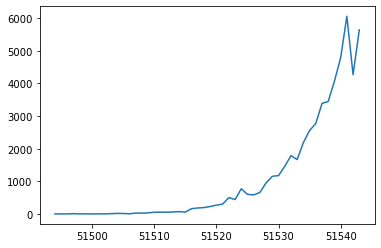

In [13]:
covid_train['new_cases'].plot()

<AxesSubplot:>

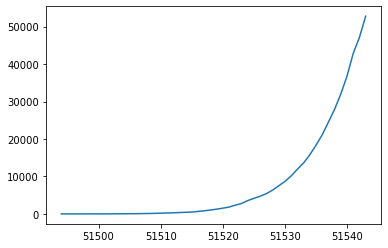

In [14]:
covid_train['total_cases'].plot()

#### Вопрос 2а
Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [21]:
y_train = np.log(covid_train['total_cases'])
x_train = np.array(range(1, len(y_train)+1))
len(y_train), len(x_train)

(50, 50)

In [18]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()
lr.fit(x_train.reshape(-1, 1), y_train)
lr.coef_, lr.intercept_

(array([0.19829091]), 1.6224462364488117)

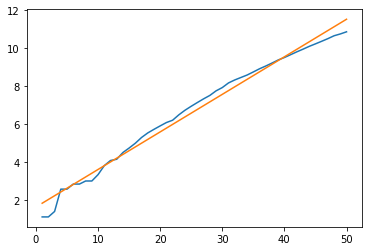

In [27]:
y_pred = lr.predict(x_train.reshape(-1, 1))

plt.plot(x_train, y_train)
plt.plot(x_train, y_pred)

(0.0, 60000.0)

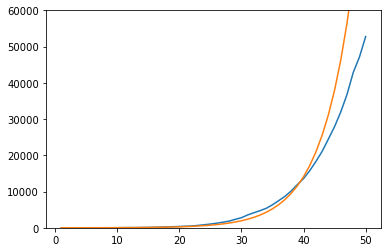

In [29]:
plt.plot(x_train, np.exp(y_train))
plt.plot(x_train, np.exp(y_pred))
plt.ylim(0, 60000)